### Why Look At Car Crash Analytics? 
The goal of this project is to take a look at this sample taken of a county and see if there are any correlations or conclusions that can be drawn from the amount of car crashes, and the time they happen at. At the end further analysis will be done to see if there is even more correlation with the type of injury suffered from the crash. 

After analyzing, we should hopefully be able to understand the following things.
- Is there a certain risk factor to driving at a certain time or are drivers more likely to crash at a certain time? 
- Do fatal car crashes frequently happen at one time verus another? 

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Establishing Our Data
The first step to getting to our goal is to load our dataset and take a look at the data structure we are working with.

In [7]:
df = pd.read_csv('crash_dataset.csv', encoding='utf-8')
print(df.head())

   Year  Month  Day Weekend?    Hour Collision Type         Injury Type  \
0  2015      1    5  Weekday     0.0          2-Car   No injury/unknown   
1  2015      1    6  Weekday  1500.0          2-Car   No injury/unknown   
2  2015      1    6  Weekend  2300.0          2-Car  Non-incapacitating   
3  2015      1    7  Weekend   900.0          2-Car  Non-incapacitating   
4  2015      1    7  Weekend  1100.0          2-Car   No injury/unknown   

                          Primary Factor      Reported_Location   Latitude  \
0  OTHER (DRIVER) - EXPLAIN IN NARRATIVE             1ST & FESS  39.159207   
1                  FOLLOWING TOO CLOSELY          2ND & COLLEGE  39.161440   
2              DISREGARD SIGNAL/REG SIGN  BASSWOOD & BLOOMFIELD  39.149780   
3          FAILURE TO YIELD RIGHT OF WAY         GATES & JACOBS  39.165655   
4          FAILURE TO YIELD RIGHT OF WAY                  W 3RD  39.164848   

   Longitude  
0 -86.525874  
1 -86.534848  
2 -86.568890  
3 -86.575956  
4 -86

### Preprocessing
After looking at the columns our data has, another important step is to handle any null values as they can throw off our data. I will only handle the ones in the Hour column as those are the only ones important to this study.

In [15]:
hour_col_nulls = df['Hour'].isnull().sum()
print(f'The number of Nulls present in the Hour column is: {hour_col_nulls}')
df = df.dropna(subset=['Hour'])

The number of Nulls present in the Hour column is: 0


### Grouping
Next we can start to group our data. I am going to group the Hour with the Crash_Count to create a DataFrame we can graph.

In [20]:
crashes_by_hour = df.groupby('Hour').size().reset_index(name='Crash_Count')
print(crashes_by_hour)

      Hour  Crash_Count
0      0.0         1115
1    100.0          801
2    200.0          716
3    300.0          719
4    400.0          478
5    500.0          514
6    600.0          806
7    700.0         2031
8    800.0         2247
9    900.0         2318
10  1000.0         2360
11  1100.0         3040
12  1200.0         3819
13  1300.0         3526
14  1400.0         3750
15  1500.0         4283
16  1600.0         4488
17  1700.0         4631
18  1800.0         3232
19  1900.0         2442
20  2000.0         1917
21  2100.0         1794
22  2200.0         1503
23  2300.0         1187


### Graphing
Now that we have our goal DataFrame, I am going to plot the data to observe the correlation. 

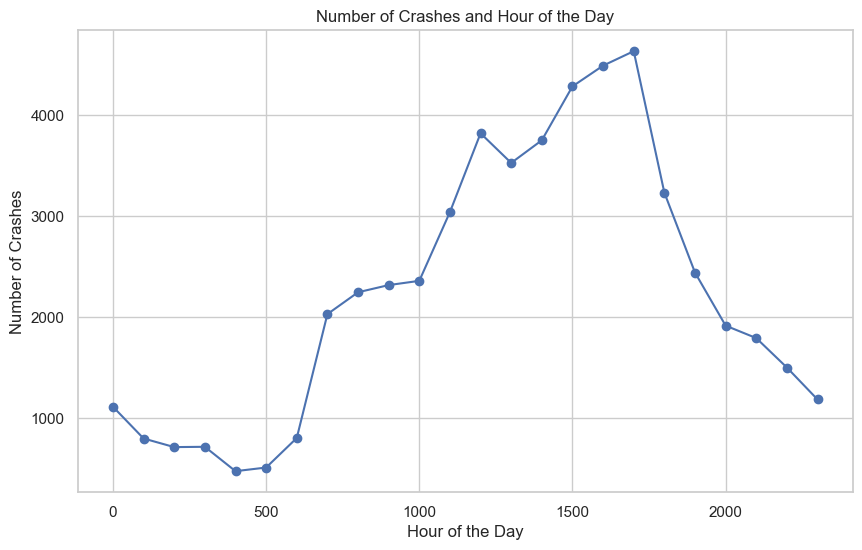

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(crashes_by_hour['Hour'], crashes_by_hour['Crash_Count'], marker='o', linestyle='-')
plt.title('Number of Crashes and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

### Better Graphing
I am going to opt to use seaborn to create a better looking graph and one that might suit the nature of our data a little more. 

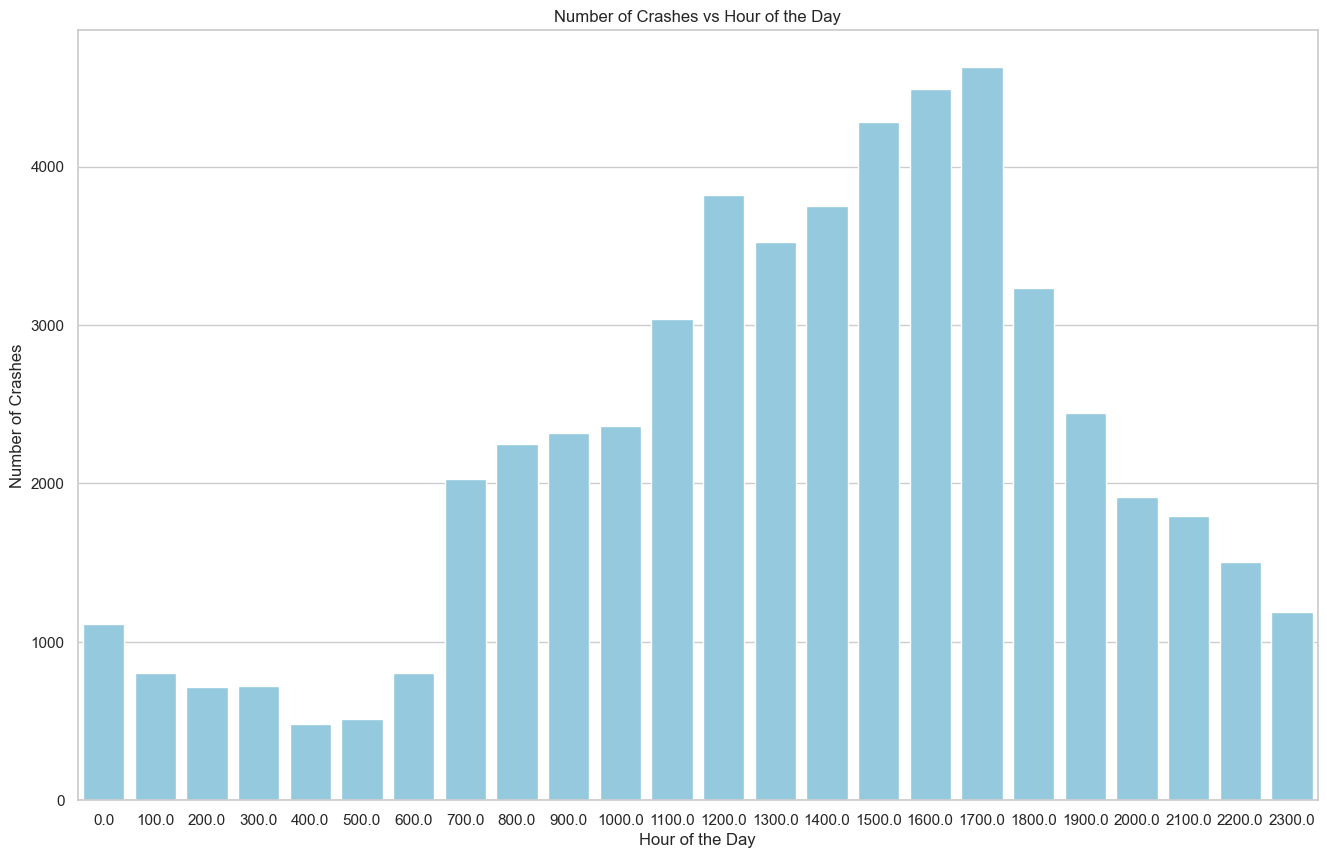

In [45]:
sns.set(style="whitegrid")

plt.figure(figsize=(16, 10))
sns.barplot(x='Hour', y='Crash_Count', data=crashes_by_hour, color='skyblue')
plt.title('Number of Crashes and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.show()

### Analysis
While looking at all the data lined up, we can see that most of the car crashes we have occur in the middle of the day to early afternoon. We can also see that the least amount of crashes happen in the early morning and the amount also starts to taper off towards the night time. If we are looking purely from a standpoint of what times are more drivers more likely to get in a crash, the data points to the afternoon. 

### Including Another Parameter & Preprocessing
Now I am going to take a look at the injury types and see if fatal car accidents are more likely to happen at a certain time. The column I need now is Injury Type. In order to preprocess it I am going to check for rows with whitespace. It turned out that all rows actually have a valid value and Injury Type, so no further action will be taken. 

In [32]:
any_whitespace_injury_type = df['Injury Type'].apply(lambda elem: elem == '' or elem == ' ').any()
if not any_whitespace_injury_type: 
    print("No whitespace in Injury Type detected")
else: 
    print("Whitespace detected")

No whitespace in Injury Type detected


### Grouping
In order to plot everything, I am going to group the Hour and Injury Type columns again to get a DataFrame. I am also going to sort the final DataFrame plot by fatal crashes as the amount compared to other injury types is very small, so to highlight the crash count I am going to focus on specifically Fatal crashes. 

In [35]:
crashes_by_hour_injury = df.groupby(['Hour', 'Injury Type']).size().reset_index(name='Crash_Count')
print(crashes_by_hour_injury)

      Hour         Injury Type  Crash_Count
0      0.0               Fatal            9
1      0.0      Incapacitating           21
2      0.0   No injury/unknown          892
3      0.0  Non-incapacitating          193
4    100.0               Fatal            6
..     ...                 ...          ...
91  2200.0  Non-incapacitating          298
92  2300.0               Fatal            4
93  2300.0      Incapacitating           29
94  2300.0   No injury/unknown          906
95  2300.0  Non-incapacitating          248

[96 rows x 3 columns]


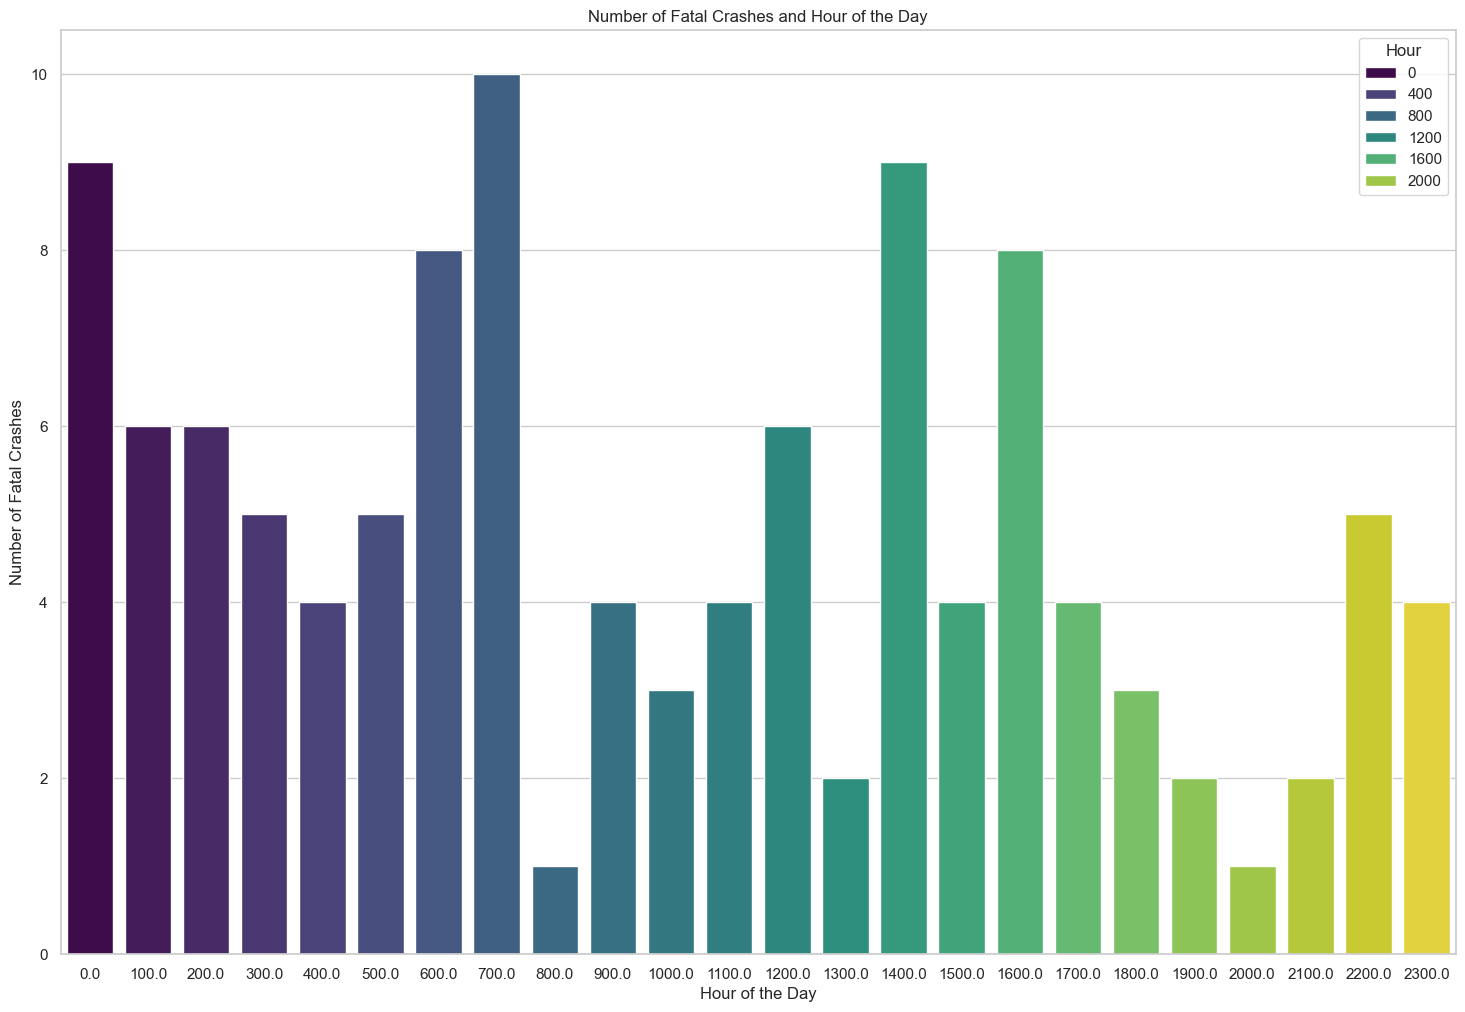

In [50]:
crashes_by_hour_injury_sorted = crashes_by_hour_injury[crashes_by_hour_injury['Injury Type'] == 'Fatal'].sort_values(by='Crash_Count', ascending=False)

sns.set(style="whitegrid")

plt.figure(figsize=(18, 12))
sns.barplot(x='Hour', y='Crash_Count', hue='Hour', data=crashes_by_hour_injury_sorted, palette='viridis', legend=True)
plt.title('Number of Fatal Crashes and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fatal Crashes')
plt.show()

### Final Review
By looking specifically now the Fatal car crashes only and the time of day they happen we can see that they are pretty scattered throughout the day, but a lot of them do occur in the later half of the day. 

After analyzing all of our data, we can assume that car crashes are likely to happen at the later time of day. When it comes to fatal car crashes, similarly they occur often in the later half of day, but do occur throughout the entire day. 